Mounted at /content/drive
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
156/156 [==============================] - 429s 3s/step - loss: 0.3847 - accuracy: 0.8908 - val_loss: 0.3581 - val_accuracy: 0.9006
Epoch 2/10
156/156 [==============================] - 418s 3s/step - loss: 0.0790 - accuracy: 0.9741 - val_loss: 0.5084 - val_accuracy: 0.8899
Epoch 3/10
156/156 [==============================] - 405s 3s/step - loss: 0.0523 - accuracy: 0.9864 - val_loss: 0.4090 - val_accuracy: 0.9101
Epoch 4/10
156/156 [==============================] - 411s 3s/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.3663 - val_accuracy: 0.9187
Epoch 5/10
156/156 [==============================] - 415s 3s/step - loss: 0.0227 - accuracy: 0.9920 - val_loss: 0.3362 - val_accuracy: 0.9220
Epoch 6/10
156/156 [==============================] - 414s 3s/step - loss: 0.0274 - accuracy: 0.9904 - val_loss: 0.5837 - val_accuracy: 0.8956
Epoch 7/10
156/156 [==============================]

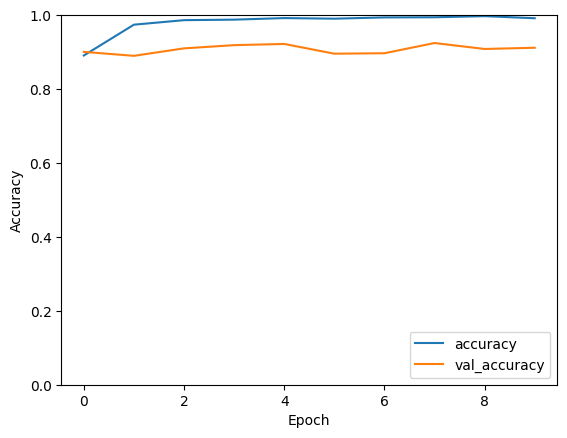

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Access the folder containing the images
import os

# Adjust the path to the folder containing your images
base_folder_path = '/content/drive/MyDrive/IITPK/CNN/DataSets'

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from sklearn.preprocessing import LabelEncoder

# Load and preprocess your entire image dataset
def load_and_preprocess_dataset(folder, max_images=500, target_size=(128, 128)):
    images = []
    labels = []

    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        image_count = 0
        for filename in os.listdir(label_path):
            if image_count >= max_images:
                break
            img_path = os.path.join(label_path, filename)
            img = tf.io.read_file(img_path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, target_size)
            img = tf.keras.applications.resnet.preprocess_input(img)
            images.append(img)
            labels.append(label)
            image_count += 1

    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

# Load the entire training dataset
train_images, train_labels = load_and_preprocess_dataset(os.path.join(base_folder_path, 'train'))

# Load the entire testing dataset
test_images, test_labels = load_and_preprocess_dataset(os.path.join(base_folder_path, 'test'))

# Encode labels
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_test_labels = label_encoder.transform(test_labels)

# Build the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation='softmax'))  # Assuming 12 categories

# Freeze the weights of the ResNet50 base model
base_model.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, encoded_train_labels,
    epochs=10,
    validation_data=(test_images, encoded_test_labels)
)

# Plot accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
